In [48]:
import datajoint as dj

In [49]:
dj.__version__

'0.12.5'

In [5]:
dj.config['database.host'] = '127.0.0.1'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'simple'
# we will go into this attribute later
dj.config['fetch_format'] = 'frame'

In [6]:
connection = dj.conn()
connection

Connecting root@127.0.0.1:3306


DataJoint connection (connected) root@127.0.0.1:3306

In [7]:
dj.config.save_local()

In [8]:
dj.config.save_global()

In [9]:

dj.set_password('simple')

Password updated.
Update local setting? [yes, no]: yes
Saved settings in dj_local_conf.json


In [10]:
schema = dj.schema('homework1')

In [12]:
@schema
class FlySubject(dj.Manual):
    definition = """
    # some fly table
    subject_id : int  # id for fly subject
    ---
    age : float # age of fly in days
    sex = 'U': enum('F', 'M', 'U')  # sex of fly
    comments = null : varchar(4000)
    """

In [13]:
fly_subject = FlySubject()
fly_subject

subject_id id for fly subject,age age of fly in days,sex sex of fly,comments


In [17]:
#using a tuple
fly_subject.insert1((0, 3.4, 'M', 'This subject was particularly eager to eat my cake and have it too.'))

# using a dictionary
fly_subject.insert1({'subject_id': 1, 'age':4.5})

DuplicateError: ("Duplicate entry '1' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [18]:
fly_subject

subject_id id for fly subject,age age of fly in days,sex sex of fly,comments
0,3.4,M,This subject was particularly eager to eat my cake and have it too.
1,4.5,U,None


In [19]:
fly_subject.insert([
    {'subject_id': 2, 'age':4.5, 'sex': 'M', 'comments':None}, 
    {'subject_id': 3, 'age':7.5, 'sex': 'F', 'comments':'some comments'}, 
    {'subject_id': 4, 'age':9.5, 'sex': 'F', 'comments':'other comments'}, 
])

In [20]:
fly_subject

subject_id id for fly subject,age age of fly in days,sex sex of fly,comments
0,3.4,M,This subject was particularly eager to eat my cake and have it too.
1,4.5,U,None
2,4.5,M,None
3,7.5,F,some comments
4,9.5,F,other comments


In [21]:
fly_subject & 'age > 5'

subject_id id for fly subject,age age of fly in days,sex sex of fly,comments
3,7.5,F,some comments
4,9.5,F,other comments


In [22]:
fly_subject & 'age > 5' & 'sex = "M"'

subject_id id for fly subject,age age of fly in days,sex sex of fly,comments


In [23]:
fly_subject & {'sex': 'M', 'age': 4.5}

subject_id id for fly subject,age age of fly in days,sex sex of fly,comments
2,4.5,M,None


In [24]:
fly_subject - {'sex':'M'}

subject_id id for fly subject,age age of fly in days,sex sex of fly,comments
1,4.5,U,None
3,7.5,F,some comments
4,9.5,F,other comments


In [25]:
fly_subject.proj() # only the primary keys

subject_id id for fly subject
0
1
2
3
4


In [26]:

fly_subject.proj('sex') # primary keys and sex column

subject_id id for fly subject,sex sex of fly
0,M
1,U
2,M
3,F
4,F


In [27]:
fly_subject.proj('sex', 'age') # primary keys and sex, age column

subject_id id for fly subject,age age of fly in days,sex sex of fly
0,3.4,M
1,4.5,U
2,4.5,M
3,7.5,F
4,9.5,F


In [28]:
fly_subject.proj(age_in_days='age') # rename age into age_in_days

subject_id id for fly subject,age_in_days age of fly in days
0,3.4
1,4.5
2,4.5
3,7.5
4,9.5


In [29]:
(fly_subject & {'sex':'M'}).proj() # restrict then project

subject_id id for fly subject
0
2


In [30]:
(fly_subject.proj() & {'sex':'M'}) # project then restrict
# since we projected first the sex column dropped before we restricted by it

subject_id id for fly subject
0
1
2
3
4


In [31]:
fly_subject.fetch() # the index is set to the primary keys

,age,sex,comments
subject_id,,,
0,3.4,M,This subject was particularly eager to eat my ...
1,4.5,U,None
2,4.5,M,None
3,7.5,F,some comments
4,9.5,F,other comments


In [32]:
fly_subject.fetch(as_dict=True)

[{'subject_id': 0,
  'age': 3.4,
  'sex': 'M',
  'comments': 'This subject was particularly eager to eat my cake and have it too.'},
 {'subject_id': 1, 'age': 4.5, 'sex': 'U', 'comments': None},
 {'subject_id': 2, 'age': 4.5, 'sex': 'M', 'comments': None},
 {'subject_id': 3, 'age': 7.5, 'sex': 'F', 'comments': 'some comments'},
 {'subject_id': 4, 'age': 9.5, 'sex': 'F', 'comments': 'other comments'}]

In [33]:
fly_subject.fetch(format='array') # here we have it as a record array

array([(0, 3.4, 'M', 'This subject was particularly eager to eat my cake and have it too.'),
       (1, 4.5, 'U', None), (2, 4.5, 'M', None),
       (3, 7.5, 'F', 'some comments'), (4, 9.5, 'F', 'other comments')],
      dtype=[('subject_id', '<i8'), ('age', '<f8'), ('sex', 'O'), ('comments', 'O')])

In [34]:
table = (fly_subject - {'sex':'M'}).fetch() # here i am also assigning the fetch table to the table variable
table  # look no male flies

,age,sex,comments
subject_id,,,
1,4.5,U,None
3,7.5,F,some comments
4,9.5,F,other comments


In [35]:
(fly_subject & {'sex':'M'}).proj().fetch()

""
subject_id
0
2


In [36]:
(fly_subject & {'sex':'M', 'age':4.5}).fetch1() # fetching a single entry

{'subject_id': 2, 'age': 4.5, 'sex': 'M', 'comments': None}

In [37]:
(fly_subject).fetch1()

DataJointError: fetch1 should only be used for relations with exactly one tuple

In [38]:
(fly_subject & {'sex':'M'}).delete()

About to delete
`homework1`.`fly_subject`: 2 items
Proceed? [yes, No]: yes
Commited.


In [39]:
fly_subject

subject_id id for fly subject,age age of fly in days,sex sex of fly,comments
1,4.5,U,None
3,7.5,F,some comments
4,9.5,F,other comments


In [40]:

fly_subject.drop()

`homework1`.`fly_subject` (3 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.


In [41]:
schema.drop()

Proceed to delete entire schema `homework1`? [yes, No]: yes


In [57]:
import my_database as db

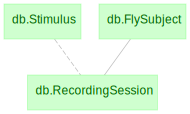

In [58]:
# you can take a look at the schema and all connections with datajoint.ERD
dj.ERD(db.schema)

In [62]:
print(db.RecordingSession.definition)



    # record them sessions
    -> FlySubject
    recording_id : int 
    ---
    -> Stimulus
    experimenter : varchar(127)
    recording_quality : enum('good', 'bad', 'ugly')
    comments = null : varchar(4000)
    

    # some fly table
    subject_id : int  # id for fly subject
    ---
    age : float # age of fly in days
    sex = 'U': enum('F', 'M', 'U')  # sex of fly
    comments = null : varchar(4000)
    


In [67]:
print(db.Stimulus.definition)


    # stimulus table
    stimulus_name : varchar(31) # short name for stimulus
    ---
    stimulus_type : enum('full-field', 'grating', 'movie')
    duration : float # in seconds
    


In [65]:
db.FlySubject.insert([
    {'subject_id': 0, 'age':10, 'sex': 'M', 'comments':'good fly'}, 
    {'subject_id': 1, 'age':1, 'sex': 'M', 'comments':'bad fly'}, 
    {'subject_id': 2, 'age':2, 'sex': 'M', 'comments':'not black and white fly'}, 
    {'subject_id': 3, 'age':7.5, 'sex': 'F', 'comments':'black and white fly'}, 
    {'subject_id': 4, 'age':9.5, 'sex': 'F', 'comments':'purple fly'}, 
])

In [81]:
db.FlySubject.proj('age','sex','comments')

subject_id id for fly subject,age age of fly in days,sex sex of fly,comments
0,10.0,M,good fly
1,1.0,M,bad fly
2,2.0,M,not black and white fly
3,7.5,F,black and white fly
4,9.5,F,purple fly


In [68]:
db.Stimulus.insert([
    {'stimulus_name': 'FF', 'stimulus_type': 'full-field', 'duration':2.4}, 
    {'stimulus_name': 'Gr', 'stimulus_type': 'grating', 'duration':1.2}, 
    {'stimulus_name': 'Mv', 'stimulus_type': 'movie', 'duration':10.2}, 
])

In [82]:
db.Stimulus.proj('stimulus_type','duration')

stimulus_name short name for stimulus,stimulus_type,duration in seconds
FF,full-field,2.4
Gr,grating,1.2
Mv,movie,10.2


In [69]:
rec = db.RecordingSession()
rec.heading

# record them sessions
subject_id           : int                          # id for fly subject
recording_id         : int                          # 
---
stimulus_name        : varchar(31)                  # short name for stimulus
experimenter         : varchar(127)                 # 
recording_quality    : enum('good','bad','ugly')    # 
comments=null        : varchar(4000)                # 

In [70]:
# this shows all primary keys for your table
print(rec.heading.primary_key, '\n')
# this shows all the dependent/secondary attributes
print(rec.heading.secondary_attributes, '\n')
# this shows all attributes
print(rec.heading.names, '\n')
# this shows some extra metadata info of your table
# you don't need to understand its key here. It's just so that you know this information exists
print(rec.heading.table_info)

['subject_id', 'recording_id'] 

['stimulus_name', 'experimenter', 'recording_quality', 'comments'] 

['subject_id', 'recording_id', 'stimulus_name', 'experimenter', 'recording_quality', 'comments'] 

{'name': 'recording_session', 'engine': 'InnoDB', 'version': 10, 'row_format': 'Dynamic', 'rows': 0, 'avg_row_length': 0, 'data_length': 16384, 'max_data_length': 0, 'index_length': 16384, 'data_free': 0, 'auto_increment': None, 'create_time': datetime.datetime(2020, 4, 28, 2, 36, 15), 'update_time': None, 'check_time': None, 'collation': 'utf8_general_ci', 'checksum': None, 'create_options': '', 'comment': 'record them sessions'}


In [84]:
db.RecordingSession.insert([
    {'subject_id': 0, 'recording_id':0, 'stimulus_name': 'FF', 'experimenter': 'Lara', 'recording_quality': 'good'},
    {'subject_id': 0, 'recording_id':1, 'stimulus_name': 'Gr', 'experimenter': 'Lara', 'recording_quality': 'good'}, 
    {'subject_id': 0, 'recording_id':2, 'stimulus_name': 'Mv', 'experimenter': 'Sarah', 'recording_quality': 'good'}, 
    {'subject_id': 1, 'recording_id':3, 'stimulus_name': 'Gr', 'experimenter': 'Lara', 'recording_quality': 'bad'},
    {'subject_id': 2, 'recording_id':4, 'stimulus_name': 'FF', 'experimenter': 'Lara', 'recording_quality': 'good'},
    {'subject_id': 3, 'recording_id':5, 'stimulus_name': 'FF', 'experimenter': 'Rhea', 'recording_quality': 'good'},
    {'subject_id': 4, 'recording_id':6, 'stimulus_name': 'Mv', 'experimenter': 'Sarah', 'recording_quality': 'ugly'},
    {'subject_id': 1, 'recording_id':7, 'stimulus_name': 'Gr', 'experimenter': 'Lara', 'recording_quality': 'good'},
    {'subject_id': 1, 'recording_id':8, 'stimulus_name': 'Gr', 'experimenter': 'Lara', 'recording_quality': 'good'},
    {'subject_id': 3, 'recording_id':9, 'stimulus_name': 'Mv', 'experimenter': 'Lara', 'recording_quality': 'good'},
])

In [85]:
db.RecordingSession.proj()

subject_id id for fly subject,recording_id
0,0
2,4
3,5
0,1
1,3
1,7
1,8
0,2
3,9
4,6


In [94]:
db.FlySubject.proj() * db.RecordingSession * db.Stimulus 

subject_id id for fly subject,recording_id,stimulus_name short name for stimulus,experimenter,recording_quality,comments,stimulus_type,duration in seconds
0,0,FF,Lara,good,None,full-field,2.4
2,4,FF,Lara,good,None,full-field,2.4
3,5,FF,Rhea,good,None,full-field,2.4
0,1,Gr,Lara,good,None,grating,1.2
1,3,Gr,Lara,bad,None,grating,1.2
1,7,Gr,Lara,good,None,grating,1.2
1,8,Gr,Lara,good,None,grating,1.2
0,2,Mv,Sarah,good,None,movie,10.2
3,9,Mv,Lara,good,None,movie,10.2
4,6,Mv,Sarah,ugly,None,movie,10.2


In [87]:
db.FlySubject * db.RecordingSession

DataJointError: Cannot join query expressions on dependent attribute `comments`

In [88]:
db.FlySubject.proj('sex', 'age', fly_comments='comments') * db.RecordingSession

subject_id id for fly subject,recording_id,age age of fly in days,sex sex of fly,fly_comments,stimulus_name short name for stimulus,experimenter,recording_quality,comments
0,0,10.0,M,good fly,FF,Lara,good,None
0,1,10.0,M,good fly,Gr,Lara,good,None
0,2,10.0,M,good fly,Mv,Sarah,good,None
1,3,1.0,M,bad fly,Gr,Lara,bad,None
1,7,1.0,M,bad fly,Gr,Lara,good,None
1,8,1.0,M,bad fly,Gr,Lara,good,None
2,4,2.0,M,not black and white fly,FF,Lara,good,None
3,5,7.5,F,black and white fly,FF,Rhea,good,None
3,9,7.5,F,black and white fly,Mv,Lara,good,None
4,6,9.5,F,purple fly,Mv,Sarah,ugly,None


In [95]:
((db.FlySubject.proj('sex', 'age', fly_comments='comments') * db.RecordingSession * db.Stimulus) & 'age > 3').fetch() 

DataJointError: Cannot join query expressions on dependent attribute `comments`